# Para ejecutar en Google Colab en Drive

In [ ]:
# Montamos el Drive al Notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Verificamos el directorio en el que nos encontramos
!pwd
!ls

/content
drive  sample_data


In [ ]:
# Cambiamos de directorio al Drive
import os
os.chdir("drive/My Drive/HackathonAiLab2021/Code")
!ls

 cantidad_de_agua.csv			     images2
'Copia de SegmentaAguaConClustering.ipynb'   images3
'Copia de segmentation.ipynb'		     SegmentaAguaConClustering.ipynb
 Descarga_ImagenSatelital2.ipynb	     SegmentaAgua.ipynb
 Descarga_ImagenSatelital.ipynb		     segmentation.ipynb
 images					     Untitled0.ipynb


# Importamos las librerias

In [ ]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

# Cargamos las imagenes

Todas las bandas del satélite SENTINEL2 para la misma imagen:


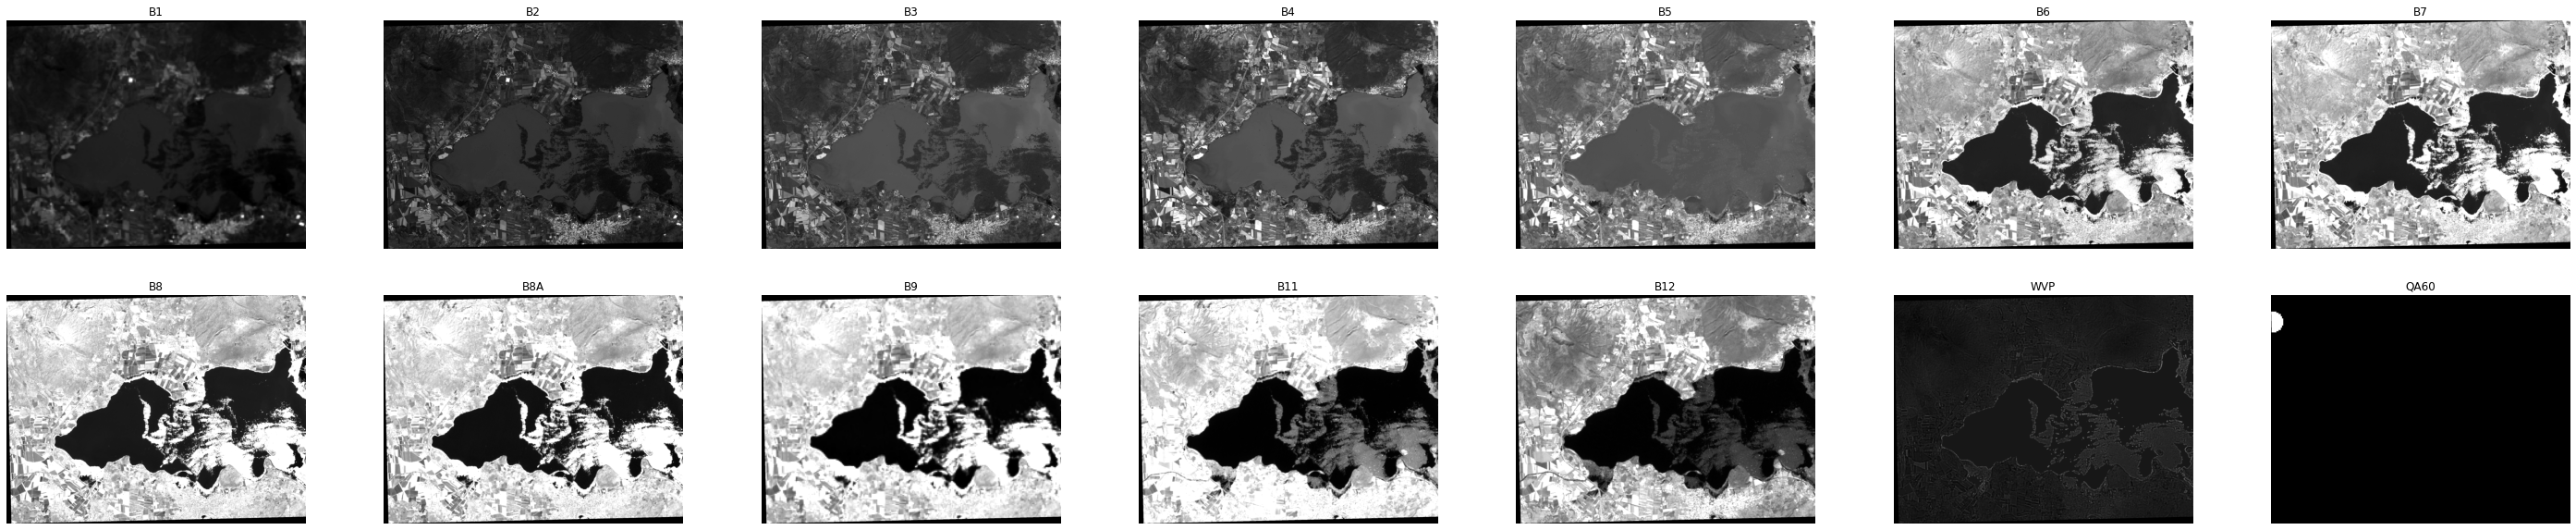

In [ ]:
Bands = ["B1","B2","B3","B4","B5","B6","B7","B8","B8A","B9","B11","B12","WVP","QA60"]

fig, ax = plt.subplots(ncols=len(Bands)//2,nrows=2, figsize=(50, 10))

print("Todas las bandas del satélite SENTINEL2 para la misma imagen:")
for i, Band in enumerate(Bands):
    img_path = "images2/sentinel2_" +Band+ "_2018_01_01.png"
    img = cv2.imread(img_path,0)

    ax[i//7, i%7].imshow(img,cmap='gray')
    ax[i//7, i%7].axis('off')
    ax[i//7, i%7].set_title(Band)

    plt.imshow(img,cmap='gray')
    
plt.show()


In [ ]:
#  Tomamos solo la banda donde se identifica mejor los cuerpos de agua
Bands = ["B11"]

imgs = []
features = []
#fig, ax = plt.subplots(ncols=len(Bands)//2,nrows=2, figsize=(50, 10))

print("Todas las bandas del satélite SENTINEL2 para la misma imagen:")
for i, Band in enumerate(Bands):
    img_path = "images2/sentinel2_" +Band+ "_2018_01_01.png"
    #img_path = "images2/huasteca_sentinel2_" +Band+ "_2018_01_01.png"
    img = cv2.imread(img_path,0)
    shape = img.shape
    print(shape)
    imgs.append(img)
    features.append(img.reshape(img.size,1))

    #ax[i//7, i%7].imshow(img,cmap='gray')
    #ax[i//7, i%7].axis('off')
    #ax[i//7, i%7].set_title(Band)

    #plt.imshow(img,cmap='gray')
    #plt.show()

#plt.show()

Todas las bandas del satélite SENTINEL2 para la misma imagen:
(1528, 2000)


# Normalizamos los datos

In [ ]:
from sklearn.preprocessing import scale

# Convetimos a array
features = np.concatenate(features,axis=1)
features.shape

# Normalizamos los datos
data_scale = scale(features)
print(data_scale.shape)

(3056000, 1)


# Proyectamos los datos con PCA

In [ ]:
from sklearn.decomposition import PCA

# Configuramos el PCA
#pca = PCA(0.9999)
#pca = PCA(0.99)
pca = PCA(0.96)
# Proyectamos con los componentes principales
X_pca = pca.fit_transform(data_scale)

# Total de componentes que explican el 96% de la varianza
ratio = pca.explained_variance_ratio_
ratio.shape

(1,)

# Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Clusterizamos para formar clases
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_fit = kmeans.fit(X_pca)

#kmeans = AgglomerativeClustering(n_clusters=8,distance_threshold=None,linkage="ward")
#kmeans_fit = kmeans.fit(X_pca)

kmeans_fit.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans_fit.labels_.shape

(3056000,)

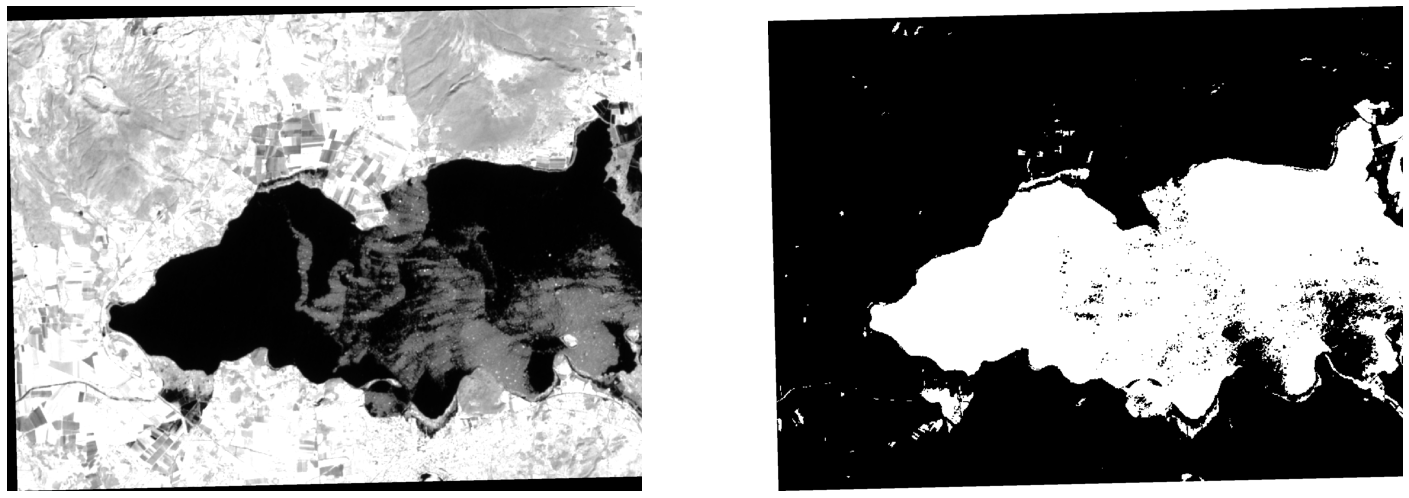

In [ ]:
# Regresamos al formato original de la imagen
mask = kmeans_fit.labels_.reshape(shape).astype(np.float32)

# visualizamos
fig, ax = plt.subplots(ncols=2, figsize=(25, 15))

#ax[0].imshow(imgs[4])
ax[0].imshow(imgs[0], cmap='gray')
ax[0].axis('off')
ax[1].imshow(mask, cmap='gray')
ax[1].axis('off')

plt.show()

# Aplicamos Análisis de Componentes Conectados

321
[855335.0, 46872.0, 45681.0, 24695.0, 11623.0, 7005.0, 4119.0, 3674.0, 1702.0, 1283.0, 1244.0, 890.0, 848.0, 495.0, 486.0, 433.0, 420.0, 415.0, 410.0, 390.0, 364.0, 326.0, 296.0, 287.0, 239.0, 222.0, 219.0, 214.0, 210.0, 203.0, 186.0, 184.0, 170.0, 157.0, 152.0, 149.0, 145.0, 139.0, 138.0, 135.0, 134.0, 133.0, 132.0, 127.0, 126.0, 125.0, 122.0, 119.0, 114.0, 108.0, 107.0, 101.0, 101.0, 100.0, 95.0, 88.0, 77.0, 77.0, 74.0, 71.0, 71.0, 70.0, 69.0, 68.0, 65.0, 64.0, 62.0, 62.0, 62.0, 61.0, 59.0, 59.0, 58.0, 55.0, 55.0, 53.0, 53.0, 52.0, 51.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 47.0, 47.0, 46.0, 45.0, 44.0, 44.0, 42.0, 42.0, 40.0, 40.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 28.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 

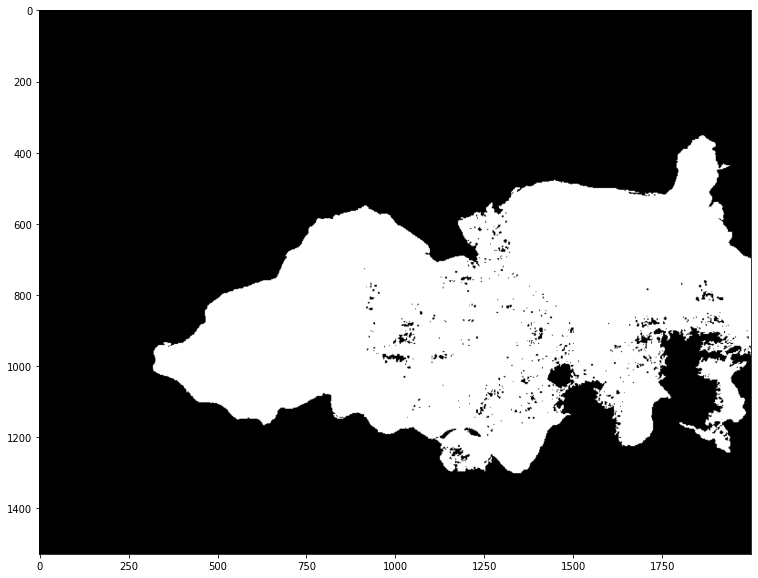

In [ ]:
from scipy import ndimage

label_im, nb_labels = ndimage.label(mask)
print(nb_labels) # how many regions?
sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))

print(sorted(sizes, reverse=True))
print(min(sizes),max(sizes))

mask_size = sizes< max(sizes)
remove_pixel = mask_size[label_im]
remove_pixel.shape
label_im[remove_pixel] = 0

rg_grande = label_im.astype(int)

plt.figure(figsize=(15,10))
plt.imshow(np.array(rg_grande,dtype=np.uint8), cmap='gray')
plt.show()

#element = np.ones((5,5))
#dilate = cv2.dilate(np.array(label_im>0,dtype=np.uint8),element)
#dilate = cv2.erode(dilate,element)

# # # Visualizamos la imagen
#plt.figure(figsize=(15,10))
#plt.imshow(dilate)
#plt.show()

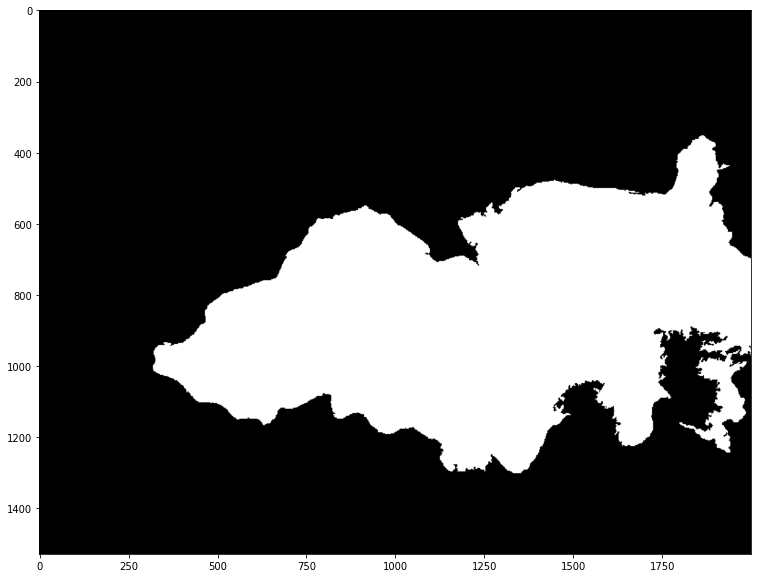

In [ ]:
# Rellenamos los hoyos
rg_fill = ndimage.binary_fill_holes(rg_grande)
plt.figure(figsize=(15,10))
plt.imshow(rg_fill, cmap='gray')
plt.show()

# Procesamos la carpeta de imágenes

In [ ]:
def normaliza_datos(features):
    # Convetimos a array
    features = np.concatenate(features,axis=1)
    features.shape

    # Normalizamos los datos
    data_scale = scale(features)
    return(data_scale)

def Aplica_PCA(data_scale):
    pca = PCA(0.96)
    # Proyectamos con los componentes principales
    X_pca = pca.fit_transform(data_scale)
    return(X_pca)

def clustering(X_pca, shape):
    # Clusterizamos para formar clases
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans_fit = kmeans.fit(X_pca)
    # Regresamos al formato original de la imagen
    mask = kmeans_fit.labels_.reshape(shape).astype(np.float32)

    return(mask)

def limpieza(mask):

    label_im, nb_labels = ndimage.label(mask)
    sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))

    mask_size = sizes< max(sizes)
    remove_pixel = mask_size[label_im]
    remove_pixel.shape
    label_im[remove_pixel] = 0

    rg_grande = label_im.astype(int)
    rg_fill = ndimage.binary_fill_holes(rg_grande)

    return(rg_fill, max(sizes))

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2018_12_22_0.png (1866, 2000)
[['B11', '2018', '12', '22', '0'], 1095717.0]


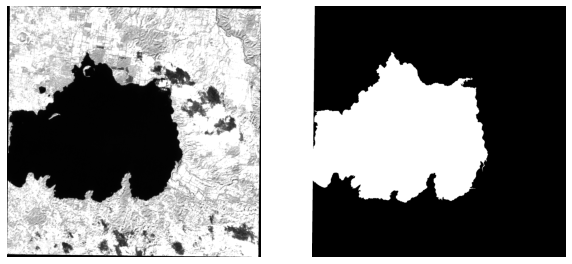

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_4_6_0.png (1976, 2000)
[['B11', '2019', '4', '6', '0'], 1091664.0]


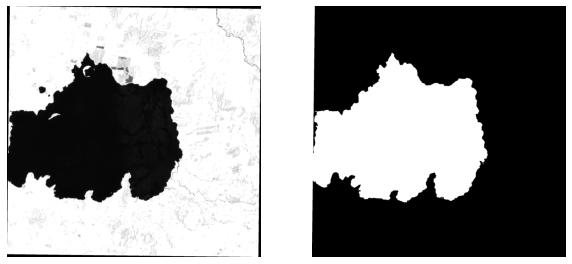

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_3_2_0.png (1976, 2000)
[['B11', '2019', '3', '2', '0'], 2603883.0]


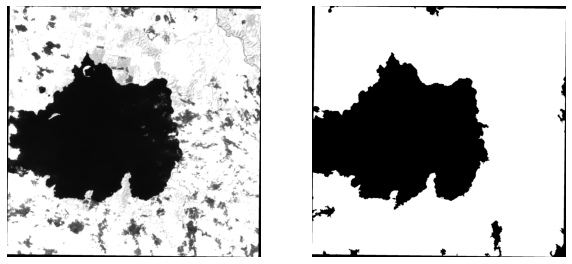

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_2_20_1.png (1976, 2000)
[['B11', '2019', '2', '20', '1'], 1096339.0]


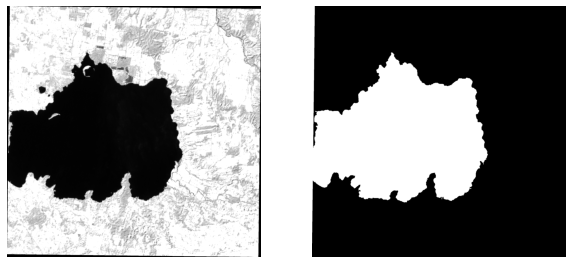

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_2_15_0.png (1976, 2000)
[['B11', '2019', '2', '15', '0'], 1095926.0]


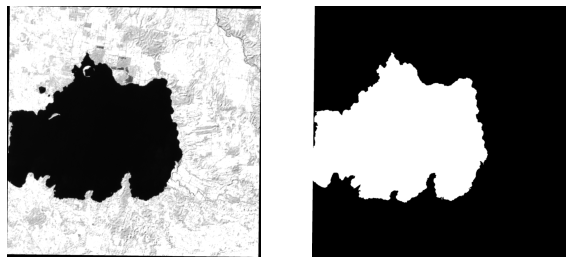

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2018_12_27_1.png (1976, 2000)
[['B11', '2018', '12', '27', '1'], 1102116.0]


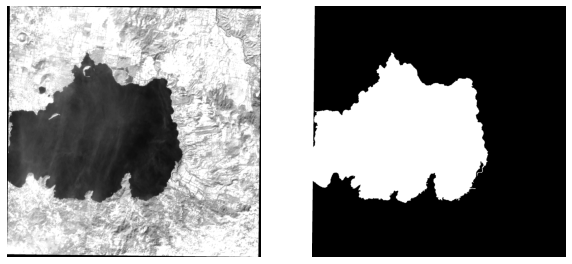

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_5_21_3.png (1976, 2000)
[['B11', '2019', '5', '21', '3'], 1090212.0]


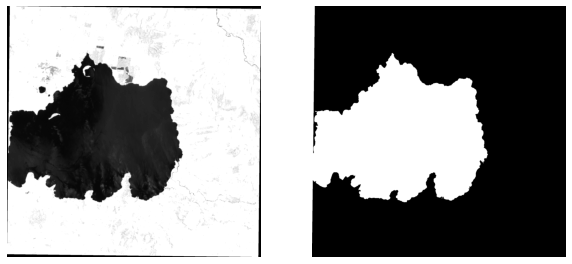

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_5_11_2.png (1976, 2000)
[['B11', '2019', '5', '11', '2'], 1090551.0]


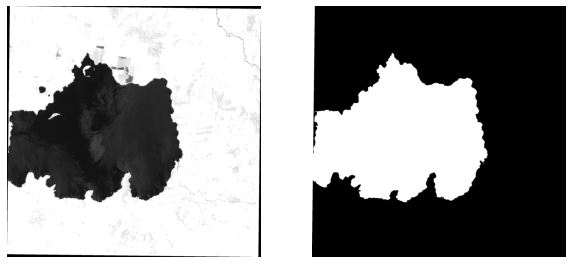

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_5_6_1.png (1976, 2000)
[['B11', '2019', '5', '6', '1'], 1090422.0]


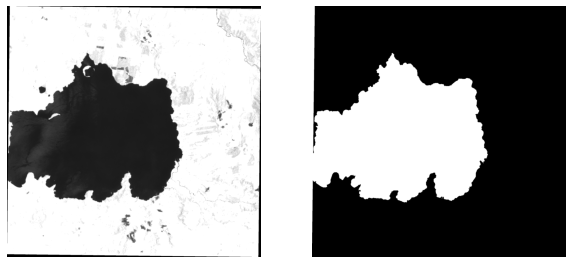

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_4_16_2.png (1976, 2000)
[['B11', '2019', '4', '16', '2'], 911887.0]


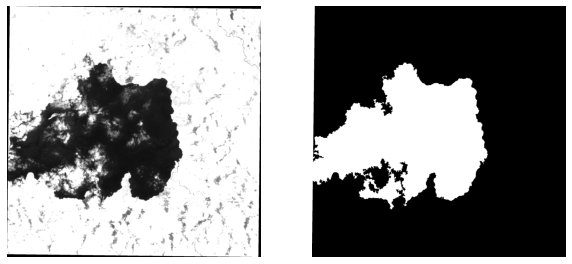

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_4_11_1.png (1976, 2000)
[['B11', '2019', '4', '11', '1'], 1092297.0]


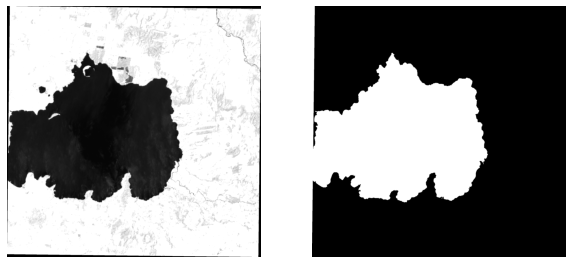

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_5_1_0.png (1976, 2000)
[['B11', '2019', '5', '1', '0'], 1090561.0]


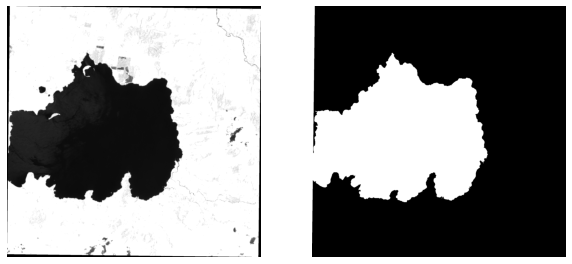

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_4_21_3.png (1976, 2000)
[['B11', '2019', '4', '21', '3'], 1091571.0]


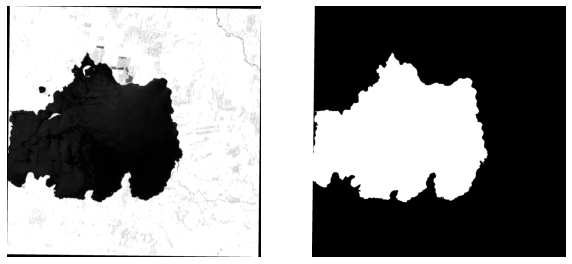

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_6_20_2.png (1976, 2000)
[['B11', '2019', '6', '20', '2'], 1073589.0]


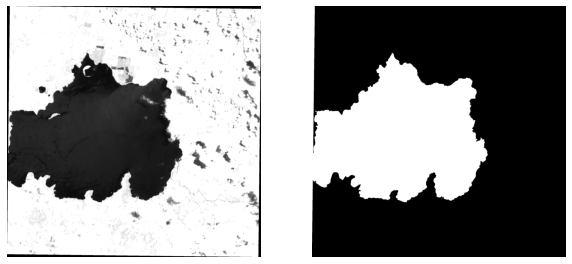

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_6_15_1.png (1976, 2000)
[['B11', '2019', '6', '15', '1'], 3047412.0]


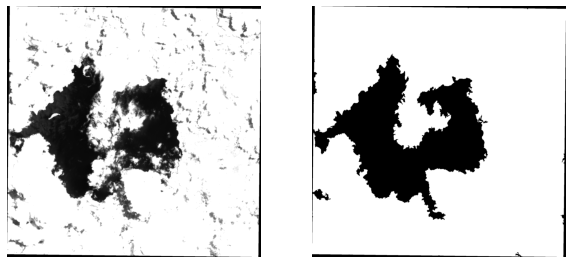

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_6_10_0.png (1976, 2000)
[['B11', '2019', '6', '10', '0'], 1069553.0]


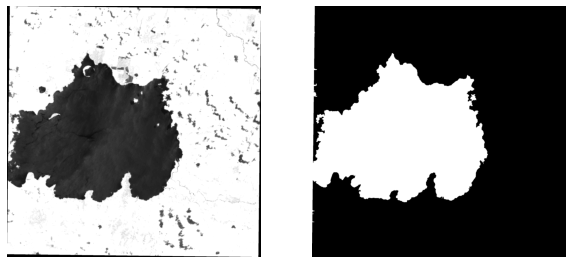

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_5_26_4.png (1976, 2000)
[['B11', '2019', '5', '26', '4'], 1083471.0]


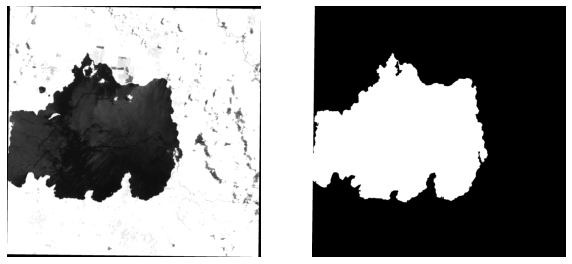

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_8_24_2.png (1976, 2000)
[['B11', '2019', '8', '24', '2'], 1089795.0]


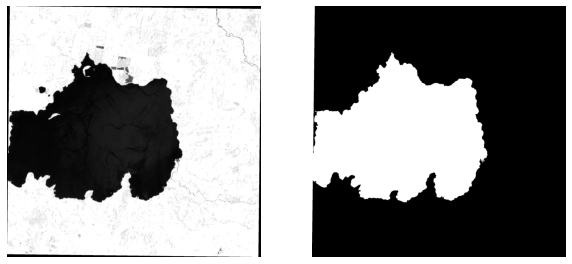

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_8_19_1.png (1976, 2000)
[['B11', '2019', '8', '19', '1'], 1038635.0]


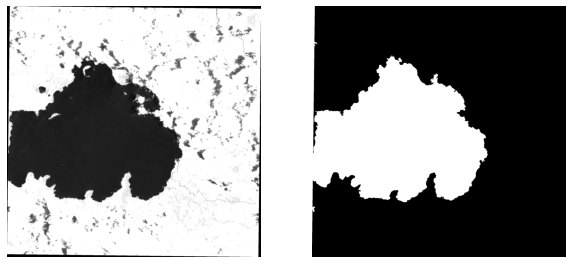

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_8_14_0.png (1976, 2000)
[['B11', '2019', '8', '14', '0'], 1089892.0]


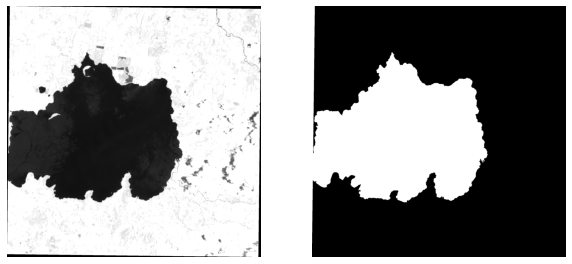

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_7_15_1.png (1976, 2000)
[['B11', '2019', '7', '15', '1'], 943443.0]


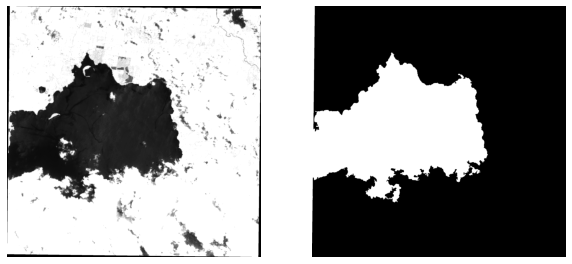

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_7_5_0.png (1976, 2000)
[['B11', '2019', '7', '5', '0'], 991129.0]


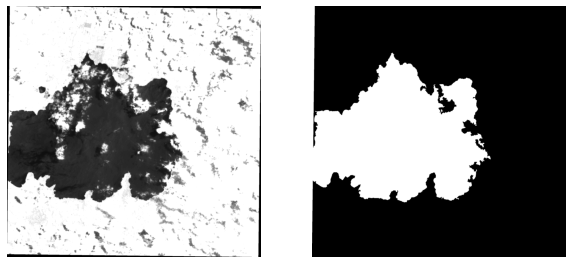

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_6_25_3.png (1976, 2000)
[['B11', '2019', '6', '25', '3'], 2837497.0]


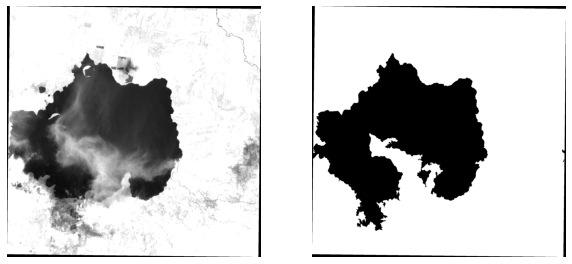

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_1_1_0.png (1976, 2000)
[['B11', '2020', '1', '1', '0'], 1093418.0]


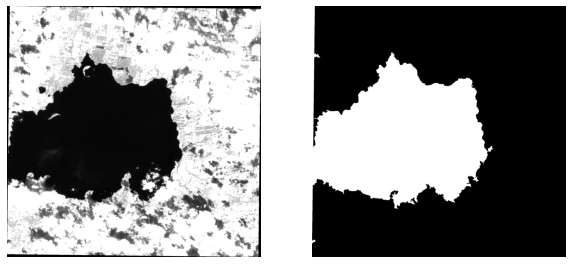

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_11_27_1.png (1976, 2000)
[['B11', '2019', '11', '27', '1'], 1097604.0]


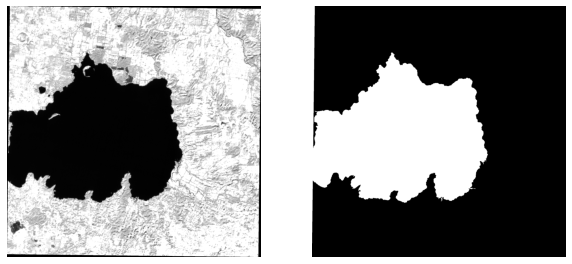

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_11_22_0.png (1976, 2000)
[['B11', '2019', '11', '22', '0'], 1101871.0]


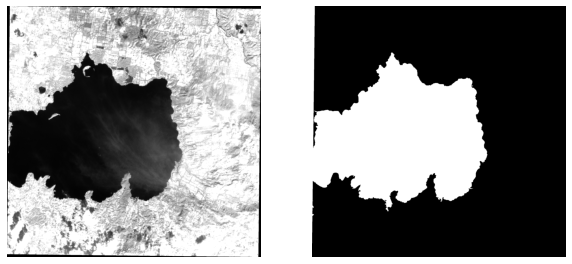

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_9_18_1.png (1976, 2000)
[['B11', '2019', '9', '18', '1'], 2689111.0]


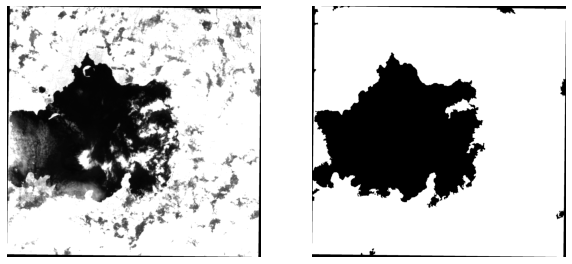

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2019_9_8_0.png (1976, 2000)
[['B11', '2019', '9', '8', '0'], 981872.0]


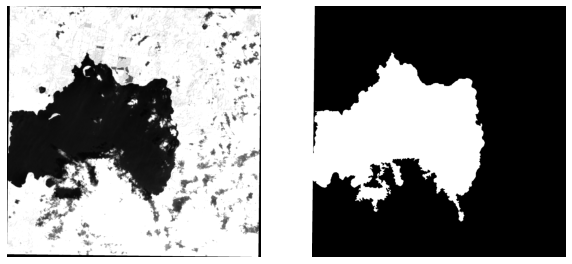

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_3_11_1.png (1976, 2000)
[['B11', '2020', '3', '11', '1'], 2551397.0]


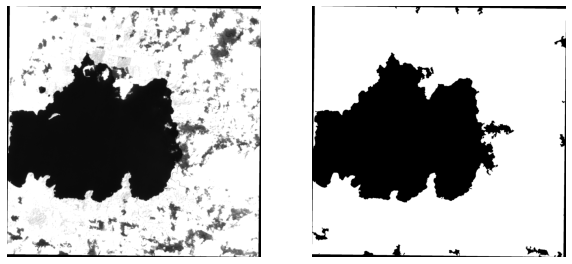

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_3_1_0.png (1976, 2000)
[['B11', '2020', '3', '1', '0'], 1095226.0]


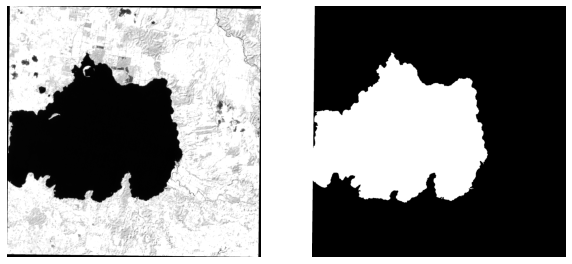

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_2_5_0.png (1976, 2000)
[['B11', '2020', '2', '5', '0'], 1096319.0]


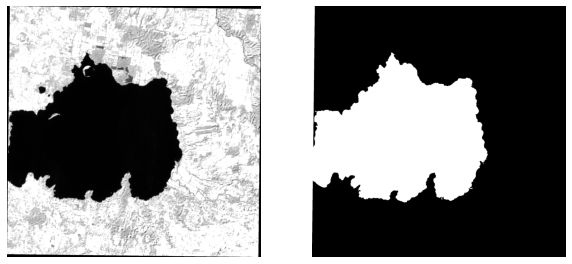

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_1_26_2.png (1976, 2000)
[['B11', '2020', '1', '26', '2'], 1109830.0]


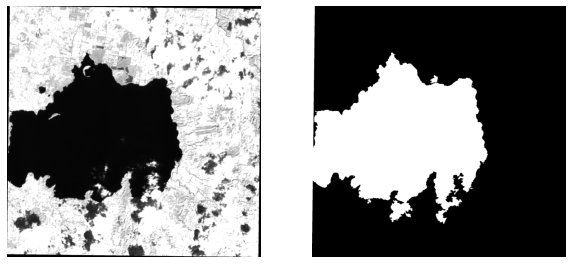

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_1_6_1.png (1976, 2000)
[['B11', '2020', '1', '6', '1'], 2595462.0]


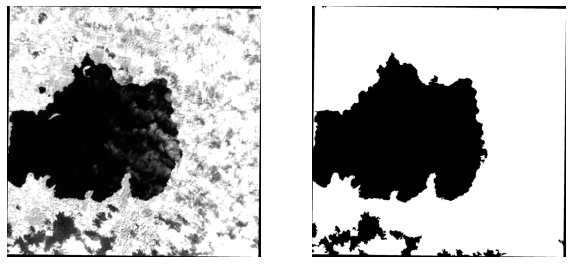

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_4_25_3.png (1976, 2000)
[['B11', '2020', '4', '25', '3'], 1091545.0]


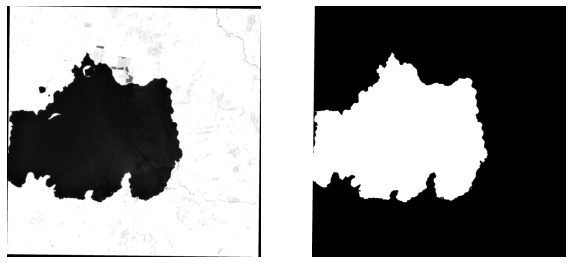

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_4_20_2.png (1976, 2000)
[['B11', '2020', '4', '20', '2'], 1092175.0]


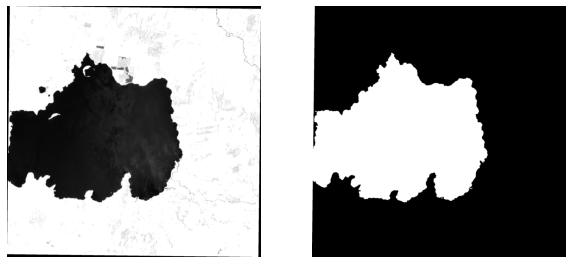

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_4_10_1.png (1976, 2000)
[['B11', '2020', '4', '10', '1'], 1091950.0]


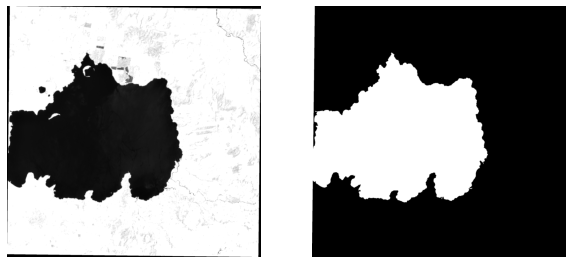

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_4_5_0.png (1976, 2000)
[['B11', '2020', '4', '5', '0'], 1092624.0]


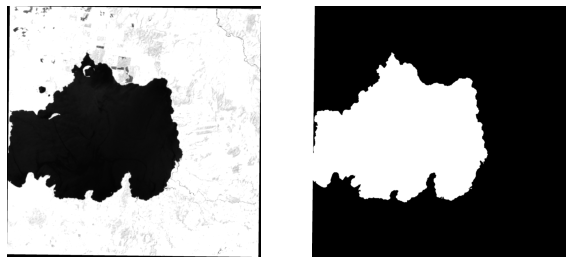

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_3_26_3.png (1976, 2000)
[['B11', '2020', '3', '26', '3'], 1093353.0]


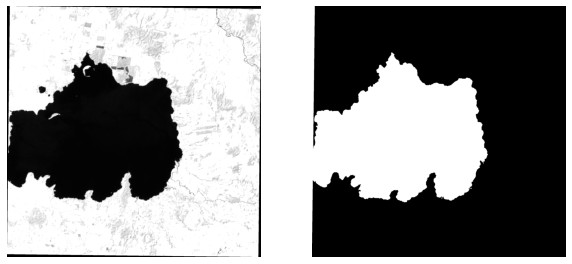

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_3_16_2.png (1976, 2000)
[['B11', '2020', '3', '16', '2'], 1079593.0]


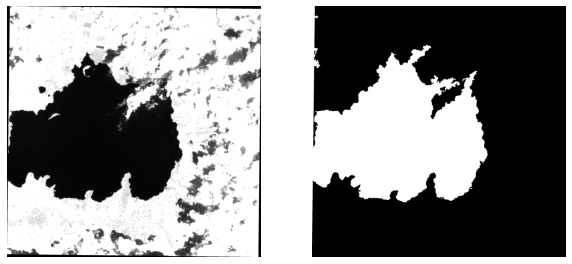

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_6_14_0.png (1976, 2000)
[['B11', '2020', '6', '14', '0'], 994517.0]


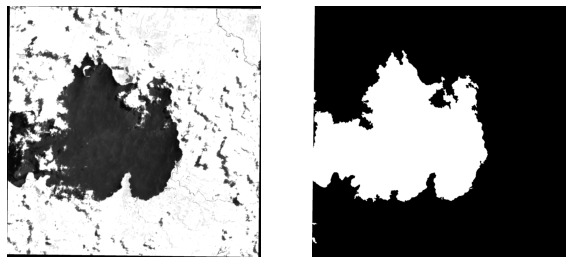

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_5_25_4.png (1976, 2000)
[['B11', '2020', '5', '25', '4'], 1064357.0]


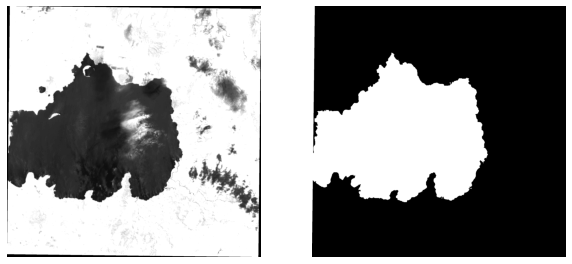

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_5_20_3.png (1976, 2000)
[['B11', '2020', '5', '20', '3'], 1033399.0]


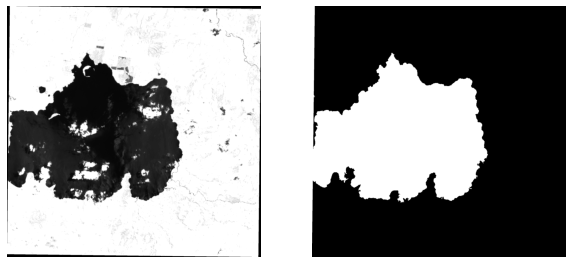

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_5_15_2.png (1976, 2000)
[['B11', '2020', '5', '15', '2'], 1091873.0]


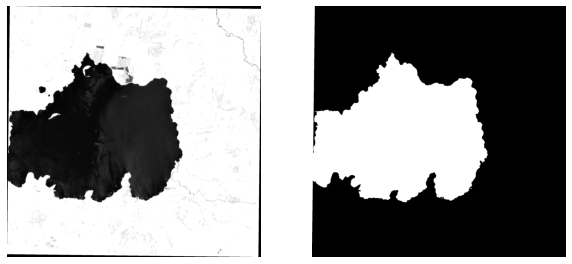

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_5_10_1.png (1976, 2000)
[['B11', '2020', '5', '10', '1'], 186867.0]


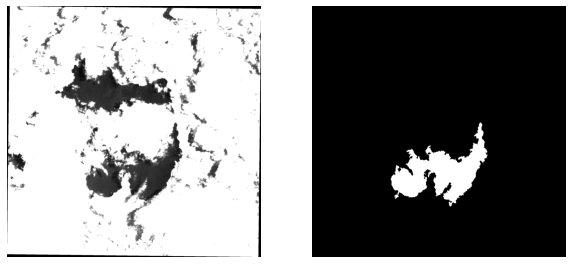

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_5_5_0.png (1976, 2000)
[['B11', '2020', '5', '5', '0'], 1092362.0]


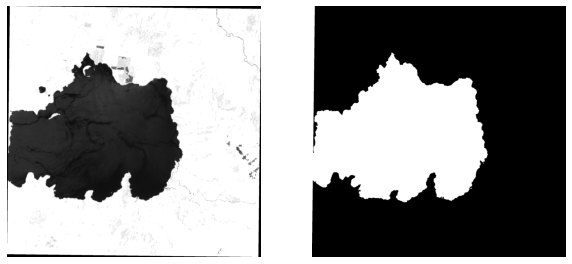

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_11_26_0.png (1976, 2000)
[['B11', '2020', '11', '26', '0'], 1110408.0]


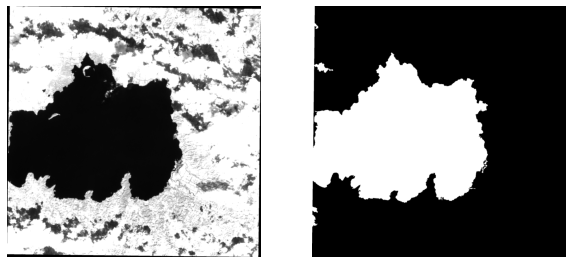

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_10_22_0.png (1976, 2000)
[['B11', '2020', '10', '22', '0'], 925907.0]


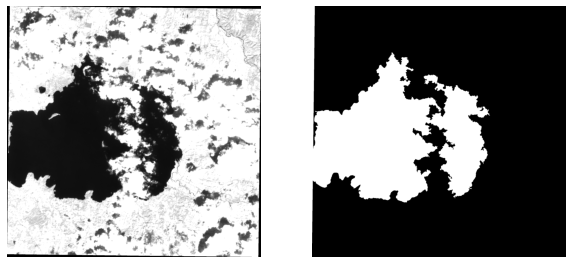

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_9_22_1.png (1976, 2000)
[['B11', '2020', '9', '22', '1'], 922835.0]


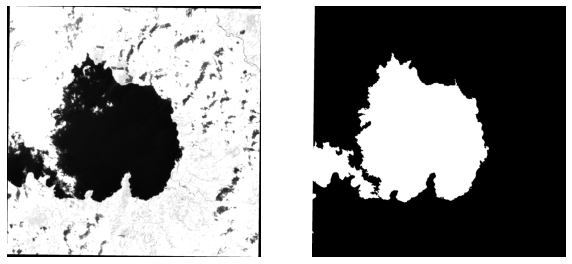

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_9_2_0.png (1976, 2000)
[['B11', '2020', '9', '2', '0'], 1095447.0]


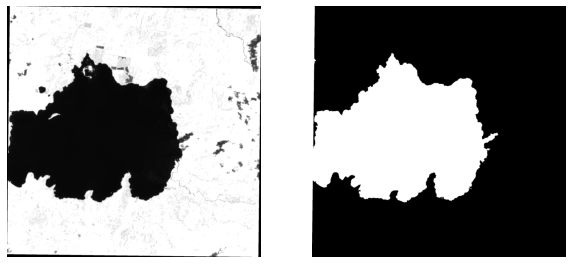

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_8_18_0.png (1976, 2000)
[['B11', '2020', '8', '18', '0'], 960232.0]


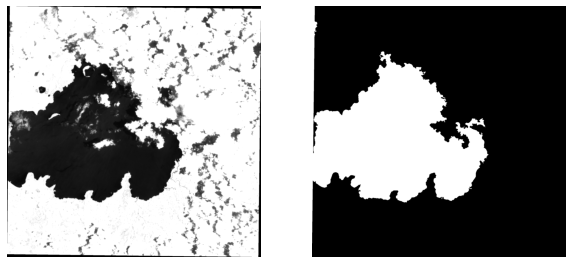

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_7_24_0.png (1976, 2000)
[['B11', '2020', '7', '24', '0'], 25645.0]


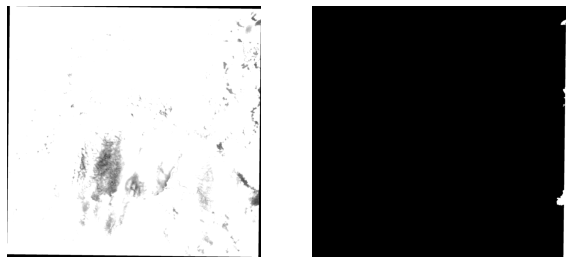

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_3_1_0.png (1976, 2000)
[['B11', '2021', '3', '1', '0'], 1096022.0]


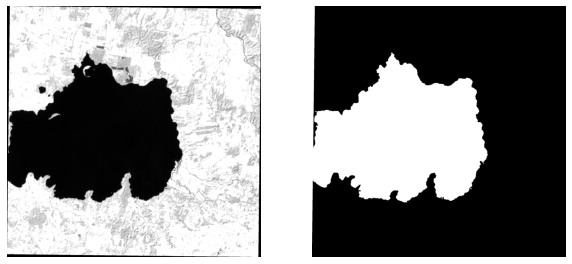

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_2_24_1.png (1976, 2000)
[['B11', '2021', '2', '24', '1'], 106252.0]


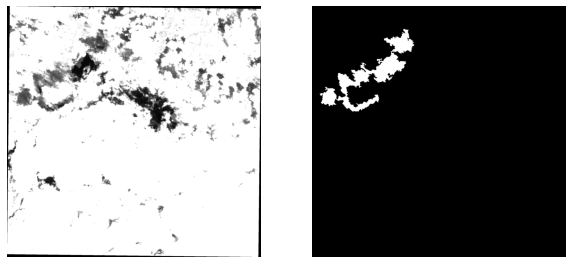

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_2_4_0.png (1976, 2000)
[['B11', '2021', '2', '4', '0'], 1097176.0]


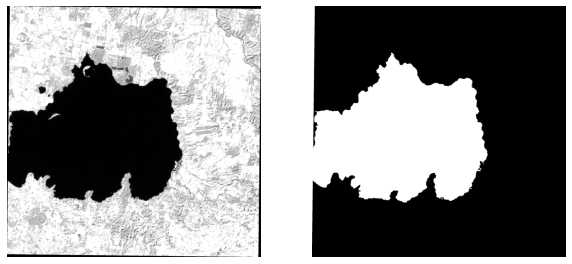

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_1_25_0.png (1976, 2000)
[['B11', '2021', '1', '25', '0'], 1097251.0]


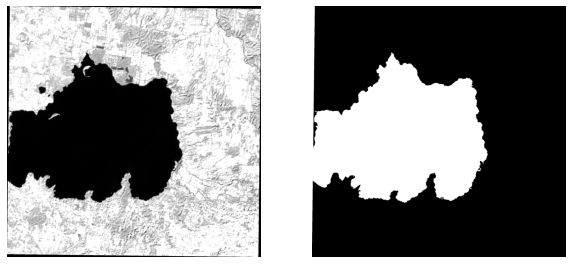

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2020_12_11_0.png (1976, 2000)
[['B11', '2020', '12', '11', '0'], 1097830.0]


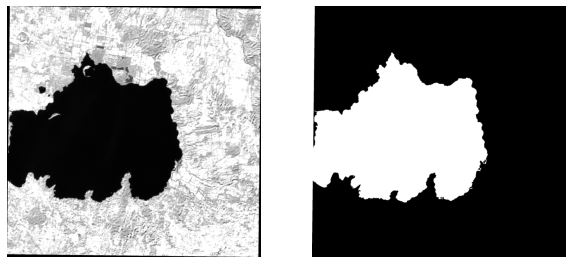

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_6_4_0.png (1976, 2000)
[['B11', '2021', '6', '4', '0'], 1004470.0]


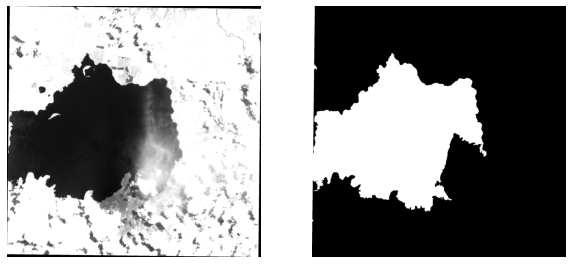

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_5_25_1.png (1976, 2000)
[['B11', '2021', '5', '25', '1'], 882794.0]


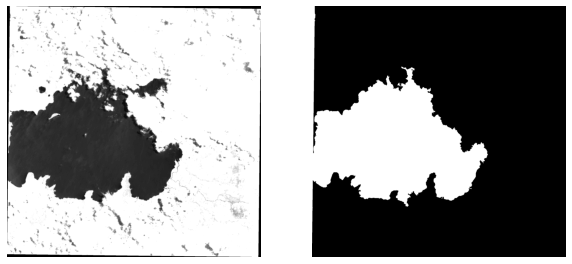

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_5_10_0.png (1976, 2000)
[['B11', '2021', '5', '10', '0'], 1088202.0]


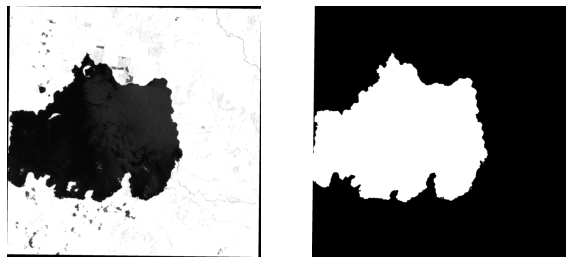

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_4_10_0.png (1976, 2000)
[['B11', '2021', '4', '10', '0'], 1093396.0]


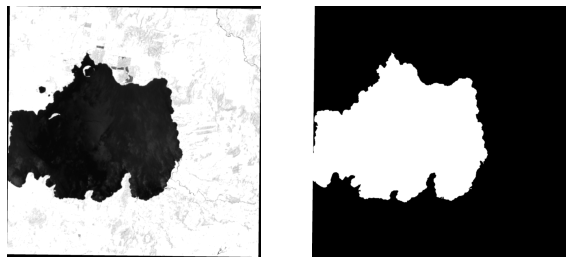

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_3_26_3.png (1976, 2000)
[['B11', '2021', '3', '26', '3'], 985553.0]


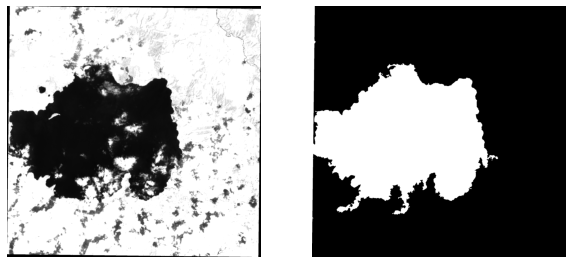

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_3_21_2.png (1976, 2000)
[['B11', '2021', '3', '21', '2'], 1060327.0]


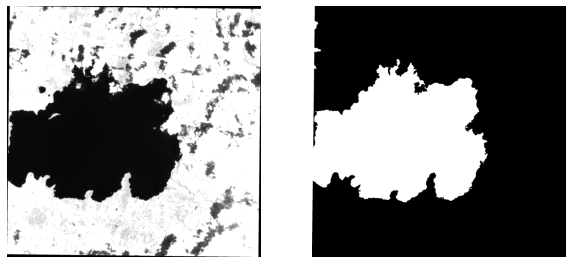

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_3_16_1.png (1976, 2000)
[['B11', '2021', '3', '16', '1'], 1094486.0]


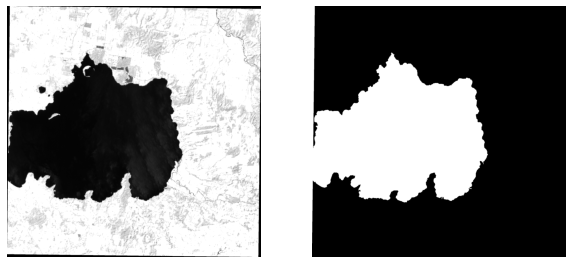

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_8_18_0.png (1976, 2000)
[['B11', '2021', '8', '18', '0'], 1076492.0]


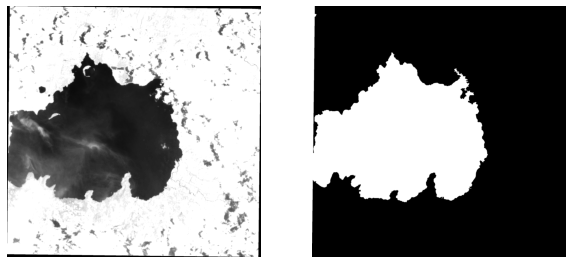

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_7_9_2.png (1976, 2000)
[['B11', '2021', '7', '9', '2'], 1066451.0]


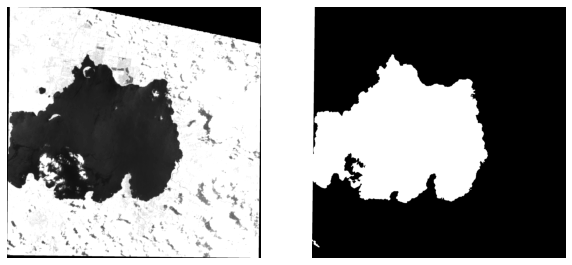

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_7_9_1.png (1978, 2000)
[['B11', '2021', '7', '9', '1'], 1064746.0]


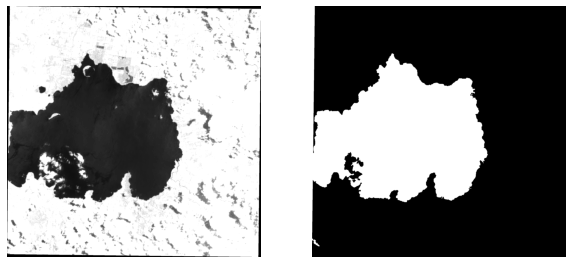

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_7_4_0.png (1976, 2000)
[['B11', '2021', '7', '4', '0'], 1083423.0]


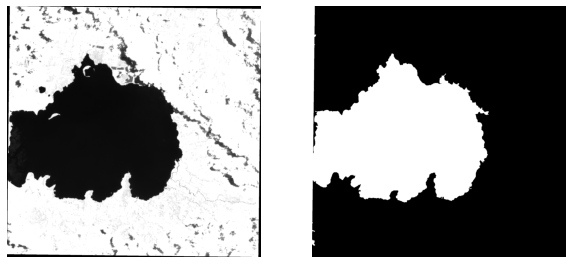

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_11_11_1.png (1976, 2000)
[['B11', '2021', '11', '11', '1'], 1095297.0]


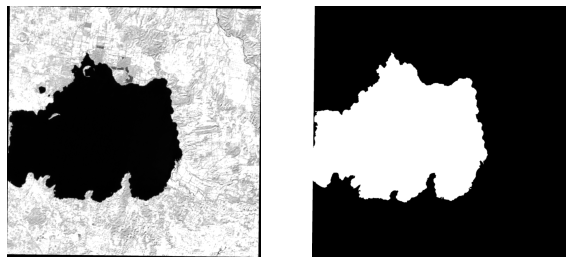

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_11_1_0.png (1976, 2000)
[['B11', '2021', '11', '1', '0'], 2625579.0]


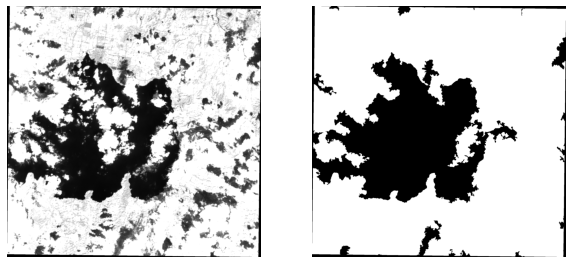

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_10_27_1.png (1976, 2000)
[['B11', '2021', '10', '27', '1'], 1095530.0]


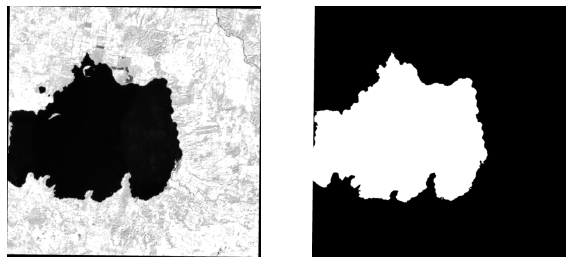

Procesando:  images3/LagunaDeCatemaco/sentinel2_B11_2021_10_12_0.png (1976, 2000)
[['B11', '2021', '10', '12', '0'], 2351672.0]


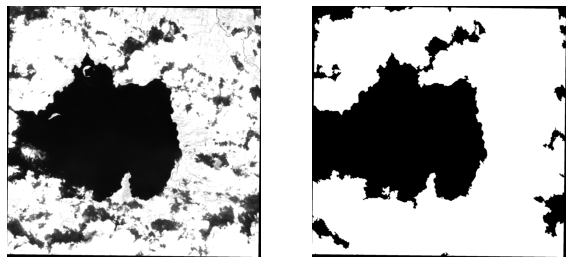

In [ ]:
import pandas as pd

#directorios = ["PresaLaPurisimaGto","LagoYuririaGto"]
#directorios = ["LagoYuririaGto"]
#directorios = ["PresaLaPurisimaGto"]
#directorios = ["LagoDeChapala"]
#directorios = ["Janitzio"]
directorios = ["LagunaDeCatemaco"]

fechas = []
for i, dir in enumerate(directorios):
    # Leemos los archivos de la carpeta de imágenes
    path = "images3/" + dir + "/"
    archivos = os.listdir(path)

    # Recorremos la lista de archivos
    for archivo in archivos:
        img_path = path + archivo

        print("Procesando: ", img_path, shape)
        img = cv2.imread(img_path,0)
        shape = img.shape

        features = [img.reshape(img.size,1)]

        data_scale = normaliza_datos(features)
        X_pca = Aplica_PCA(data_scale)
        mask = clustering(X_pca, shape)
        agua, area = limpieza(mask)

        fechas += [[dir]+archivo.split(".")[0].split("_")[1:] + [area]]

        # Visualizamos
        print([archivo.split(".")[0].split("_")[1:], area])
        fig, ax = plt.subplots(ncols=2, figsize=(10, 7))

        ax[0].imshow(img, cmap='gray')
        ax[0].axis('off')
        ax[1].imshow(agua, cmap='gray')
        ax[1].axis('off')
        plt.show()

In [ ]:
# Guardamos los resultados
resultados = pd.DataFrame(fechas)
resultados.to_csv('images3/cantidad_de_agua.csv', index=False, sep=",")
print("Guardado exitosamente!!!")

Guardado exitosamente!!!
